The assignment seeks to test the correlation between fertility and the GDP pr. capita in Denmark. First of, data from Danmarks Statistik on the fertility is analysed in order to see the trends in the period ranging from 1973 to 2018.

In [175]:
# Importing modules and packages

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as pd
import pandas as pd
import ipywidgets as widgets


# Creating and renaming columns in dataset in a dictionary
columns_dict = {}
columns_dict['Unnamed: 0'] = 'year'
columns_dict['Samlet fertilitet'] = 'fertility'
columns_dict['15-19'] = 'AG1'
columns_dict['20-24'] = 'AG2'
columns_dict['25-29'] = 'AG3'
columns_dict['30-34'] = 'AG4'
columns_dict['35-39'] = 'AG5'
columns_dict['40-44'] = 'AG6'
columns_dict['45-49'] = 'AG7'

# Reading in Excelfile from Danmarks statistik
fert = pd.read_excel('FOD33.xlsx',skiprows=2)

fert['15-19'] = fert['15 år'] + fert['16 år'] + fert['17 år'] + fert['18 år'] + fert['19 år']
fert['20-24'] = fert['20 år'] + fert['21 år'] + fert['22 år'] + fert['23 år'] + fert['24 år']
fert['25-29'] = fert['25 år'] + fert['26 år'] + fert['27 år'] + fert['28 år'] + fert['29 år']
fert['30-34'] = fert['30 år'] + fert['31 år'] + fert['32 år'] + fert['33 år'] + fert['34 år']
fert['35-39'] = fert['35 år'] + fert['36 år'] + fert['37 år'] + fert['38 år'] + fert['39 år']
fert['40-44'] = fert['40 år'] + fert['41 år'] + fert['42 år'] + fert['43 år'] + fert['44 år']
fert['45-49'] = fert['45 år'] + fert['46 år'] + fert['47 år'] + fert['48 år'] + fert['49 år']


# Dropping columns for cleaner dataset
fert.drop(['15 år','16 år','17 år','18 år','19 år','20 år','21 år','22 år','23 år','24 år','25 år','26 år','27 år',
          '28 år','29 år','30 år','31 år','32 år','33 år','34 år','35 år','36 år','37 år','38 år','39 år','40 år',
          '41 år','42 år','43 år','44 år','45 år','46 år','47 år','48 år','49 år','Bruttoreproduktionstal',
          'Nettoreproduktionstal'],axis=1,inplace=True)

# Renaming variables
fert.rename(columns=columns_dict,inplace=True)

# Getting summary statistics from the dataset
fert.describe()


,year,fertility,AG1,AG2,AG3,AG4,AG5,AG6,AG7
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1995.500000,1703.780435,35.163043,298.630435,605.210870,515.891304,208.397826,38.660870,1.860870
std,13.422618,141.291569,23.737849,141.257877,56.873768,146.028574,91.088105,20.347934,1.181238
min,1973.000000,1377.400000,8.000000,130.400000,496.700000,292.000000,85.600000,14.100000,0.700000
25%,1984.250000,1661.975000,21.125000,189.050000,572.925000,350.450000,115.675000,20.250000,0.925000
50%,1995.500000,1741.650000,29.300000,267.800000,601.600000,573.400000,219.250000,35.000000,1.400000
75%,2006.750000,1785.350000,34.150000,348.975000,648.175000,648.925000,302.300000,55.600000,2.600000
max,2018.000000,1918.800000,98.500000,638.300000,714.200000,699.100000,343.900000,80.200000,4.800000


It can be seen from the descriptive statistics that most kids are born when women are between 25 and 34 (AG3 and AG4). What can further be deducted from the statistics is, that there is quite a large variation, or standard deviation, in the agegroup 20-24(AG2) and agegroup 30-34(AG4). This might show a trend of women having kids later(or earlier) than they did in the 70's. In a later section there will be a visual representation that dives deeper into this.

In the next section data of the GDP pr. capita is taken from Danmarks Statistik and cleaned for use in further analysis.

In [185]:
# Creating and renaming columns in second dataset in a dictionary
col_dict = {}
col_dict['Unnamed: 0'] = 'Type'
col_dict['Pr. indbygger, 2010-priser, kædede værdier, (1000 kr.)'] = 'bnp'
col_dict['Unnamed: 1'] = 'year'

# Reading in second excelfile from Danmarks statistik
gdp = pd.read_excel('NAN1.xlsx',skiprows=2)

# Dropping columns to keep the relevant statistics for the analysis
gdp.drop(['Løbende priser, (mia. kr.)','2010-priser, kædede værdier, (mia. kr.)',
          'Realvækst i pct. i forhold til foregående periode',
                     'Pr. indbygger, løbende priser, (1000 kr.)',
          'Bidrag til realvækst i BNP, (procentpoint)'],axis=1,inplace=True)

# Renaming variables
gdp.rename(columns=col_dict,inplace=True)

# Dropping extra data, so only the GDP remains
for val in ['BNP']: 
    I = gdp.Type.str.contains(val)
    gdp = gdp.loc[I == True]



# Checking variable types
print(gdp.dtypes)

# Converting bnp from object to string
gdp['bnp'] = gdp.bnp.astype(float)

# Summary statistics for the dataset
gdp.describe()



Type     object
year    float64
bnp      object
dtype: object


,year,bnp
count,53.000000,53.000000
mean,1992.000000,260.973585
std,15.443445,64.223537
min,1966.000000,147.000000
25%,1979.000000,203.300000
50%,1992.000000,256.700000
75%,2005.000000,324.100000
max,2018.000000,353.900000


The data used in the bnp column is in 1000 dkk. chained 2010-prices. It shows a large difference from the lowest value to maximum value, which might be a sign of people having more money, but this will be inspected in the visual analysis later on.

In the section below the two datasets are merged having the column year in common. The data are then cleaned in order to make the visual representation of the merged set easier to process. ALso the correlation between overall fertility, fertility in the two agegroups with the largest standard deviation and the GDP pr. capita is tested. The reason for the testing of the two groups is because I want to see if there might be something to the notion that women having a career, and therebry more money, have children later in life.

In [203]:
# Merging the two datasets on the variable year
full_data = pd.merge(fert,gdp,how='left',on=['year'])

# Leaving out the column Type for a neater looking dataset
full_data = full_data.drop(columns='Type')

# Summary statistics for the merged dataset
full_data.describe()
print(full_data.describe())

# Checking Correlation between fertility and GDP
corr_data = full_data[['fertility','bnp','AG2','AG4']]
corr = corr_data.corr(method='pearson')
print(corr)



              year    fertility        AG1         AG2         AG3  \
count    46.000000    46.000000  46.000000   46.000000   46.000000   
mean   1995.500000  1703.780435  35.163043  298.630435  605.210870   
std      13.422618   141.291569  23.737849  141.257877   56.873768   
min    1973.000000  1377.400000   8.000000  130.400000  496.700000   
25%    1984.250000  1661.975000  21.125000  189.050000  572.925000   
50%    1995.500000  1741.650000  29.300000  267.800000  601.600000   
75%    2006.750000  1785.350000  34.150000  348.975000  648.175000   
max    2018.000000  1918.800000  98.500000  638.300000  714.200000   

              AG4         AG5        AG6        AG7         bnp  
count   46.000000   46.000000  46.000000  46.000000   46.000000  
mean   515.891304  208.397826  38.660870   1.860870  275.436957  
std    146.028574   91.088105  20.347934   1.181238   55.916670  
min    292.000000   85.600000  14.100000   0.700000  181.700000  
25%    350.450000  115.675000  20.25000

There is nothing new to the descriptive statistics of the merged dataset, but the correlation matrix is more interesting to investigate. Overall there is a positive correlation between a higher GDP pr. capita and the fertility(0.40), but what is even more interesting is that correlation between fertility in the younger of the two agegorups (AG2 - 20-24) is almost -1, and the correlation between the elder agegroup (AG4 - 30-34) is really close to 1. This might suggest that the notion about higher GDP pr. capita leads to women postponing childbirth is true. The correlation between the variables is also almost equal to -1, which makes sense in the way that childbirth is simply postponed, so the fertility in the first agegroup will fall whereas the fertility in the second agegroup will rise. But whether it is only correlation and not causation is hard to conclude on the small foundation of the data.

In the next section a visual representation of the overall fertility and GDP pr. capita is shown along with the two agegroups described earlier. This distorts the visualisation a bit, but some trends can be seen from visual analysis. Furthermore an index calculation is made of both variables and they are also presented visaully in graphs.

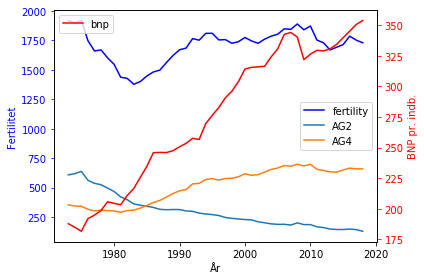

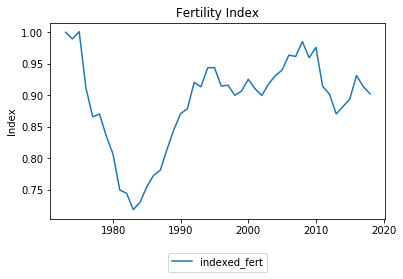

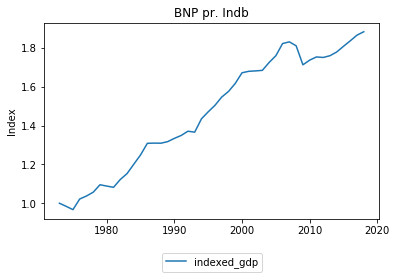

In [204]:
# Creating a plot with two y-axes, starting with defining the first y-axis and plot
fig, ax1 = plt.subplots()
t = full_data.year
s1 = full_data.fertility
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('År')

s3 = full_data.AG2
ax1.plot(t, s3)
s4 = full_data.AG4
ax1.plot(t, s4)

# Labeling the axis coloring the series line and adding a legend
ax1.set_ylabel('Fertilitet', color='b')
ax1.tick_params('y', colors='b')
ax1.legend()

# Setting up the second y-axis and plot
ax2 = ax1.twinx()
s2 = full_data.bnp
ax2.plot(t, s2, 'r')
ax2.set_ylabel('BNP pr. indb.', color='r')
ax2.tick_params('y', colors='r')
ax2.legend()

# Sewtting the layout and printing the plot
fig.tight_layout()
plt.show()

# Indexing fertility rate
full_data_grouped_f = full_data.groupby('fertility')
full_data_first_fert = full_data_grouped_f.fertility.first()
full_data_first_fert.name = 'first_fert'

full_data.set_index(['fertility'],inplace=True)
full_data = full_data.join(full_data_first_fert)
full_data.reset_index(inplace=True)

full_data['indexed_fert'] = full_data['fertility']/full_data.iloc[0,0]

### Plot indexed figure for fertility rates:
fig_indexed_f = plt.figure()
fig_indexed_f = plt.subplot(111)
plt.plot(full_data.year,full_data.indexed_fert)
fig_indexed_f.set_ylabel('Index')
fig_indexed_f.set_title('Fertility Index')
box = fig_indexed_f.get_position()
fig_indexed_f.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
fig_indexed_f.legend(loc='upper center', bbox_to_anchor = (0.5, -0.15),ncol=5);

# Indexing GDP pr. capita
full_data_grouped_g = full_data.groupby('bnp')
full_data_first_gdp = full_data_grouped_g.bnp.first()
full_data_first_gdp.name = 'first_gdp'

full_data.set_index(['year'],inplace=True)
full_data = full_data.join(full_data_first_gdp)
full_data.reset_index(inplace=True)

full_data['indexed_gdp'] = full_data['bnp']/full_data.iloc[0,9]


### Plot indexed figure for GDP per cap:
fig_indexed_g = plt.figure()
fig_indexed_g = plt.subplot(111)
plt.plot(full_data.year,full_data.indexed_gdp)
fig_indexed_g.set_ylabel('Index')
fig_indexed_g.set_title('BNP pr. Indb')
box = fig_indexed_g.get_position()
fig_indexed_g.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
fig_indexed_g.legend(loc='upper center', bbox_to_anchor = (0.5, -0.15),ncol=5);



First of it can be said that the indexes looks exactly like the original graphs, why there is no need to elaborate any further on them. It can be seen fromn the first figure that overall fertility took a plunge from the beginning of the 70's until the mid-80's where the trend then became and upward slope for the next 10 or so years, whereafter it somewhat stabilises. What is reasonably obvious from the the graph is that there is a clear tendency of the fertility of agegroup between 30-34 following the GDP pr. capita curve. There is a lack though from the beginning of the economic crisis to the fertility rate falling, which can have various explanations, one being that making a baby takes nine months, whereas a fall in GDP can happen rather quickly (economic crisis can cost a lot of jobs simultaneously, lowering the GDP pr. capita).

Finally in order to have a look on the percentage change of fertility and th eother variables, a smaller dataset and a visual representation has been made.

In [205]:
# Percentage deviation in in 5 year intervals
full_data.drop(['first_fert','indexed_fert','first_gdp','indexed_gdp'], axis=1,inplace=True)

full_data_pct = full_data[::5]

full_data_pct_ch = full_data_pct.pct_change()
full_data_pct_ch['year'] = full_data.year
print(full_data_pct_ch.head())

fuller_data = pd.melt(full_data_pct_ch, id_vars=['year'])
fuller_data.sort_values(by=['variable','year'],inplace=True)
fuller_data = fuller_data.reset_index(drop=True)
fuller_data.head()

    year  fertility       AG1       AG2       AG3       AG4       AG5  \
0   1973        NaN       NaN       NaN       NaN       NaN       NaN   
5   1978  -0.129630 -0.249741 -0.136707 -0.086180 -0.125635 -0.214345   
10  1983  -0.174468 -0.491713 -0.310620 -0.129231 -0.000646 -0.077495   
15  1988   0.133875 -0.122283 -0.135560  0.128975  0.360258  0.553510   
20  1993   0.121270 -0.030960 -0.092622  0.053834  0.274822  0.426667   

         AG6       AG7       bnp  
0        NaN       NaN       NaN  
5  -0.352227 -0.562500  0.056945  
10 -0.075000  0.571429  0.090634  
15  0.398649 -0.090909  0.135734  
20  0.550725  0.100000  0.043496  


,year,variable,value
0,1973,AG1,NaN
1,1978,AG1,-0.249741
2,1983,AG1,-0.491713
3,1988,AG1,-0.122283
4,1993,AG1,-0.030960


In [206]:
def plot1(df, variable):
    I = df['variable'] == variable
    fig2, ax = plt.subplots(ncols=2, figsize=(10,4))
    growth5 = df.loc[I,:].plot.bar(x = 'year', y = 'value', legend = False, ax=ax[0])
    growth5.set_ylabel('Growth in pct.')
    growth5.set_xlabel('5-year period')
    growth5.set_title("5-year growth rate in fertility, \n 1973-2018")
    
widgets.interact(plot1,
    df = widgets.fixed(fuller_data),
    variable = widgets.Dropdown(
    options=fuller_data.variable.unique(),
    value='fertility',
    description='AgeGroup:')
);


interactive(children=(Dropdown(description='AgeGroup:', index=8, options=('AG1', 'AG2', 'AG3', 'AG4', 'AG5', '…

The final graph shows that the positive changes in fertility has happened in the agegroups from 30 and up after. This supports the main question of the project, that is whether there is a correlation between GDP pr. capita and women postponing childbirth to later in life.